# Fire Incident Data in California 2013-2020 
## Data Analysis and Static Maps

Research question: What relationships exist between housing status and wildfire incidence in California?


Data Sources: 2013-2020 Wildfire Incidence Data https://www.kaggle.com/ananthu017/california-wildfire-incidents-20132020
              ACS 2019 Housing Tenure by California County https://censusreporter.org/data/table/?table=B25003&geo_ids=140|31000US41940&primary_geo_id=31000US41940#  
              


## Data Exploration
First I'll import relevant libraries. 

In [129]:
import pandas as pd 
import geopandas as gpd 
import contextily as ctx 
import matplotlib.pyplot as plt
import numpy as np

Then I'll bring in the fire incident data from 2013-2020 in the State of California. 

In [91]:
firedata = pd.read_csv('California_Fire_Incidents.csv')

Let's take a look at what the table looks like

In [92]:
firedata.sample(5)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
465,1470.0,False,CAL FIRE / Riverside County Fire,NaN,2016,True,/incidents/2016/8/30/bogart-fire/,NaN,NaN,Riverside,...,"Bogart Fire, Riverside County, Winesap Avenue,...",2016-08-30T12:25:00Z,Finalized,NaN,1.0,NaN,NaN,944e953f-ed28-4b99-8d60-d352c702e6f9,2016-09-02T18:10:00Z,NaN
119,50.0,False,CAL FIRE Santa Clara Unit,NaN,2013,True,/incidents/2013/7/12/uvas-fire/,NaN,NaN,Santa Clara,...,"Uvas Fire, July 2013, Uvas Road, Casa Loma Roa...",2013-07-12T13:09:00Z,Finalized,NaN,NaN,NaN,NaN,e779a754-29fd-472f-8d29-46cfee32d3c2,2013-07-12T17:45:00Z,NaN
1259,48.0,False,CAL FIRE Santa Clara Unit,NaN,2018,True,/incidents/2018/8/26/castro-fire/,NaN,NaN,Alameda,...,"Castro Fire, August 2018, Alameda County",2018-08-26T14:23:00Z,Finalized,NaN,NaN,NaN,NaN,a2fbfcae-d658-41f4-88c6-98239d08ff29,2019-01-04T09:14:00Z,NaN
816,92.0,False,CAL FIRE/Riverside County Fire/San Bernardino ...,NaN,2017,True,/incidents/2017/8/7/reed-fire/,NaN,NaN,Riverside,...,"Reed Fire, Aguanga, Riverside County, Reed Val...",2017-08-07T14:14:00Z,Finalized,NaN,NaN,NaN,NaN,ab009bd1-6784-4fda-a931-532520742a8b,2018-01-09T12:23:00Z,NaN
1019,12.0,False,CAL FIRE Madera-Mariposa-Merced Unit,NaN,2017,True,/incidents/2017/12/31/taglio-fire/,NaN,NaN,Merced,...,"Taglio Fire, May 2017, Interstate 5, Taglio Ro...",1969-12-31T16:00:00Z,Finalized,NaN,NaN,NaN,NaN,fcb8579e-7469-4c9e-9eac-527264e6f26b,2018-01-09T10:05:00Z,NaN


Now I'll trim the dataset and get rid of columns I'm not interested in. I'm mostly getting rid of columns relating to fire status because the date range for these fires is between 2013-2020, so we know they're out by now. The remaining columns that were dropped are either not relevant or mostly contain missing data. The columns relating to structure damage/threat have a lot of missing data too but I still want to see if there's something I can salvage from that. 

In [93]:
firedata = firedata.drop(columns=['Active','Status','ConditionStatement','ControlStatement','AirTankers',
                       'CanonicalUrl','Featured','Final','PercentContained','Dozers','Engines',
                       'Helicopters','WaterTenders','CrewsInvolved','Extinguished','Fatalities',
                       'FuelType','Injuries','PersonnelInvolved','Public'])


In [32]:
firedata

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Latitude,Location,Longitude,MajorIncident,Name,SearchDescription,SearchKeywords,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated
0,257314.0,Stanislaus National Forest/Yosemite National Park,2013,True,Tuolumne,55,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,The Rim Fire was east of Groveland along Highw...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z
1,30274.0,USFS Angeles National Forest/Los Angeles Count...,2013,True,Los Angeles,19,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,The Powerhouse Fire burned in May and June 201...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z
2,27531.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,33,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,The Mountain Fire burned in July 2013 off High...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z
3,27440.0,Tahoe National Forest,2013,False,Placer,31,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,The American Fire burned in August 2013 off De...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z
4,24251.0,Ventura County Fire/CAL FIRE,2013,True,Ventura,56,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9.0,CAL FIRE / Riverside County Fire,2019,True,Riverside,33,33.827979,"Eagle Canyon Rd. and Cajalco Rd., southwest of...",-117.499619,False,Eagle Fire,"The Eagle Fire started on October 10, 2019 nea...",NaN,2019-10-10T12:08:00Z,NaN,NaN,NaN,NaN,6e93b252-99a3-4214-9921-238373b17535,2019-10-10T18:11:59.733Z
1632,2.0,CAL FIRE Nevada-Yuba-Placer Unit,2019,True,Nevada,29,39.409722,"Off of Long Point Road and Old Mill Road, Sou...",-121.000556,False,Long Fire,"Long Fire started on June 28, 2019 off of Long...",NaN,2019-06-28T15:03:04Z,NaN,NaN,NaN,NaN,b38c0563-b321-431b-9174-6336c5a0d449,2019-06-30T15:52:01.023Z
1633,NaN,Yolo County Fire Protection District,2019,False,Yolo,57,38.734634,"County Road 102 and County Road 17, North of W...",-121.729691,False,Cashe Fire,"The Cashe Fire started November 25, 2019 off C...",NaN,2019-11-25T12:02:02Z,NaN,NaN,NaN,NaN,9c26f915-1b33-422d-b30a-9eb4da6fd729,2019-12-03T16:35:20.93Z
1634,NaN,Camp Pendleton Marine Corps Base,2019,False,San Diego,37,33.351145,"Near Basilone Road and Las Pulgas Road, near C...",-117.403719,False,Oak Fire,"The Oak Fire started October 22, 2019 off near...",NaN,2019-10-22T19:20:44Z,NaN,NaN,NaN,NaN,7264a106-e0f4-41de-8fd0-3f9110431e28,2019-11-21T12:21:28.58Z


As you can see below, there's still 175 data points for Structures that were destroyed in fires, including reports for fires with zero destroyed structures (as opposed to fires with no data on destroyed structures). I'm going to trim the dataset again to understand which fires have data on destroyed structures. I know there is probably a smarter way to check how many data points there are in a column but I kind of guesstimated my way to 175 using 'nlargest' and at some point the 'Length: 175' shows up too at the bottom of the cell.

In [94]:
firedata['StructuresDestroyed'].nlargest(n=176)

1060    18804.0
628      5636.0
629      5636.0
1061     1643.0
1062     1643.0
         ...   
749         0.0
1334        0.0
1418        0.0
1430        0.0
1462        0.0
Name: StructuresDestroyed, Length: 175, dtype: float64

Now I want to create a dataframe specifically looking at Structures Destroyed (sd) by dropping the NaNs under the structures destroyed column. 

In [95]:
sddf = firedata.dropna(subset=['StructuresDestroyed'])

In [96]:
sddf

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Latitude,Location,Longitude,MajorIncident,Name,SearchDescription,SearchKeywords,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated
4,24251.0,Ventura County Fire/CAL FIRE,2013,True,Ventura,56,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z
6,20292.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,33,33.861570,"Poppet Flats Rd near Hwy 243, south of Banning",-116.904270,True,Silver Fire,The Silver Fire burned in August 2013 off Popp...,"Silver Fire, August 2013, Popet Flats Road, Hi...",2013-08-07T14:05:00Z,8.0,40.0,NaN,NaN,c400203b-a7fd-4bd8-803a-f3c74bc32a2b,2013-08-12T18:00:00Z
10,8073.0,CAL FIRE Shasta-Trinity Unit,2013,True,Shasta,45,40.498332,"Community of Igo, 10 miles southwest of Redding",-122.535496,True,Clover Fire,The Clover Fire burned September 2013 near the...,"Clover Fire, September 2013, Shasta County, Ig...",2013-09-09T12:32:00Z,10.0,201.0,NaN,NaN,92af9783-eda9-4186-afe9-447f61a92636,2013-09-15T07:30:00Z
11,7055.0,CAL FIRE San Diego Unit / Cleveland National F...,2013,True,San Diego,37,32.954350,"off Sunrise Hwy, 9 miles southeast of Julian",-116.473810,True,Chariot Fire,Chariot Fire burned in July 2013 off Sunrise H...,"Chariot Fire, July 2013, Sunrise Hwy, Julian, ...",2013-07-06T12:55:00Z,9.0,149.0,NaN,NaN,ee19b2ec-a96a-4738-994e-fb3ea016e053,2013-07-15T06:15:00Z
15,3505.0,CAL FIRE Sonoma-Lake-Napa Unit,2013,True,Sonoma,49,38.816700,"The Geysers area, 10 miles northeast of Geyser...",-122.849800,True,McCabe Fire,The McCabe Fire is burning in The Geysers area...,"The Geysers area, Cloverdale, Sonoma County, M...",2013-11-22T02:04:00Z,NaN,1.0,NaN,NaN,b4bc1480-cbb8-4ef2-8d5f-88a496d21d10,2013-11-27T18:15:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,350.0,CAL FIRE / Riverside County Fire,2019,True,Riverside,33,33.975405,"Reche Canyon Rd and Jordan Dr, Moreno Valley",-117.207068,True,Reche Fire,The Reche Vegetation Fire started on October 1...,NaN,2019-10-10T14:18:17Z,1.0,1.0,NaN,NaN,8739a46c-9d9b-464c-87d0-31738601d96f,2019-10-14T10:56:50.567Z
1462,220.0,Los Padres National Forest,2019,False,San Luis Obispo,40,35.214364,"Upper Lopez Canyon Road & Wittenberg Creek Rd,...",-120.455883,True,Lopez Fire,"The Lopez Fire started on September 9, 2019 of...",NaN,2019-09-21T14:26:00Z,NaN,0.0,NaN,24.0,840010ca-aef0-4f91-b771-3bf196317d03,2019-10-24T11:23:10.07Z
1518,85.0,CAL FIRE Amador - El Dorado Unit,2019,True,El Dorado,9,38.898915,"Highway 193 and Penobscot Rd, east of Cool",-120.946657,True,Country Fire,"The Country Fire started on September 3, 2019 ...",NaN,2019-09-03T14:57:31Z,NaN,4.0,NaN,NaN,89008310-149d-480f-946f-4ce5a2a71c3f,2019-09-08T18:11:21.837Z
1549,53.0,CAL FIRE Sonoma Lake Napa Unit,2019,True,Lake,17,38.955024,"Highway 29 and Cole Creek Road, South of Kelse...",-122.833831,False,Oak Fire,"The Oak Fire started September 7, 2019 off Hig...",NaN,2019-09-07T14:00:00Z,NaN,1.0,NaN,NaN,25e65946-2e28-453b-bcb4-617b623be750,2019-09-08T07:45:11.27Z


I'm currently examining destroyed structures by wildifre, so next I want to drop any duplicates of the same fire. 
There are some duplicates in the dataset, as there is also a county column, and some fires span multiple counties. So I'll be dropping by the 'Name' Column. 

In [97]:
sddf1 = sddf.drop_duplicates(subset=['Name'])

In [98]:
sddf1

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Latitude,Location,Longitude,MajorIncident,Name,SearchDescription,SearchKeywords,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated
4,24251.0,Ventura County Fire/CAL FIRE,2013,True,Ventura,56,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z
6,20292.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,33,33.861570,"Poppet Flats Rd near Hwy 243, south of Banning",-116.904270,True,Silver Fire,The Silver Fire burned in August 2013 off Popp...,"Silver Fire, August 2013, Popet Flats Road, Hi...",2013-08-07T14:05:00Z,8.0,40.0,NaN,NaN,c400203b-a7fd-4bd8-803a-f3c74bc32a2b,2013-08-12T18:00:00Z
10,8073.0,CAL FIRE Shasta-Trinity Unit,2013,True,Shasta,45,40.498332,"Community of Igo, 10 miles southwest of Redding",-122.535496,True,Clover Fire,The Clover Fire burned September 2013 near the...,"Clover Fire, September 2013, Shasta County, Ig...",2013-09-09T12:32:00Z,10.0,201.0,NaN,NaN,92af9783-eda9-4186-afe9-447f61a92636,2013-09-15T07:30:00Z
11,7055.0,CAL FIRE San Diego Unit / Cleveland National F...,2013,True,San Diego,37,32.954350,"off Sunrise Hwy, 9 miles southeast of Julian",-116.473810,True,Chariot Fire,Chariot Fire burned in July 2013 off Sunrise H...,"Chariot Fire, July 2013, Sunrise Hwy, Julian, ...",2013-07-06T12:55:00Z,9.0,149.0,NaN,NaN,ee19b2ec-a96a-4738-994e-fb3ea016e053,2013-07-15T06:15:00Z
15,3505.0,CAL FIRE Sonoma-Lake-Napa Unit,2013,True,Sonoma,49,38.816700,"The Geysers area, 10 miles northeast of Geyser...",-122.849800,True,McCabe Fire,The McCabe Fire is burning in The Geysers area...,"The Geysers area, Cloverdale, Sonoma County, M...",2013-11-22T02:04:00Z,NaN,1.0,NaN,NaN,b4bc1480-cbb8-4ef2-8d5f-88a496d21d10,2013-11-27T18:15:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,600.0,CAL FIRE Shasta-Trinity Unit,2019,True,Shasta,45,40.715556,"Bear Mountain Road and Dry Creek Road, north o...",-122.241944,True,Mountain Fire,"The Mountain Fire started August 22, 2019 off ...",NaN,2019-08-22T11:02:09Z,7.0,14.0,NaN,NaN,1bf3e829-5fb3-43d2-9179-6c337709df19,2019-10-02T16:06:52.9Z
1436,526.0,Unified Command: CAL FIRE Sonoma-Lake-Napa Uni...,2019,True,Napa,28,38.165873,"American Canyon and Highway 80, east of Americ...",-122.211671,False,American Fire,"The American Fire started on October 6, 2019 o...",NaN,2019-10-06T16:36:50Z,NaN,1.0,NaN,NaN,74c3d01f-8809-40bc-a0e2-b1cc24bf1a7d,2019-10-09T13:52:17.697Z
1445,350.0,CAL FIRE / Riverside County Fire,2019,True,Riverside,33,33.975405,"Reche Canyon Rd and Jordan Dr, Moreno Valley",-117.207068,True,Reche Fire,The Reche Vegetation Fire started on October 1...,NaN,2019-10-10T14:18:17Z,1.0,1.0,NaN,NaN,8739a46c-9d9b-464c-87d0-31738601d96f,2019-10-14T10:56:50.567Z
1462,220.0,Los Padres National Forest,2019,False,San Luis Obispo,40,35.214364,"Upper Lopez Canyon Road & Wittenberg Creek Rd,...",-120.455883,True,Lopez Fire,"The Lopez Fire started on September 9, 2019 of...",NaN,2019-09-21T14:26:00Z,NaN,0.0,NaN,24.0,840010ca-aef0-4f91-b771-3bf196317d03,2019-10-24T11:23:10.07Z


This drops the number of data points down to 145. 

I think it would be interesting to look at the fire data in order of most structures destroyed. So first I'll make a dataframe in order of most structures damaged to the least. 

In [101]:
sddf_sorted = sddf1.sort_values('StructuresDestroyed',ascending=False)

In [102]:
sddf_sorted

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Latitude,Location,Longitude,MajorIncident,Name,SearchDescription,SearchKeywords,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated
1060,153336.0,"Unified Command: CAL FIRE, Butte County Sherif...",2018,True,Butte,4,39.813400,Pulga Road at Camp Creek Road near Jarbo Gap,-121.434700,True,Camp Fire,"The Camp Fire started on November 8, 2018 off ...","Camp Creek Rd, Highway 70, Feather River Canyo...",2018-11-08T06:33:00Z,NaN,18804.0,NaN,NaN,75dafe80-f18a-4a4a-9a37-4b564c5f6014,2019-11-15T09:30:48.693Z
628,36807.0,CAL FIRE Sonoma-Lake-Napa Unit,2017,True,Napa,"28,49",38.608950,"off of Hwy 128 and Bennett Ln, Calistoga",-122.628790,True,Tubbs Fire (Central LNU Complex),"The Tubbs Fire, part of the Central LNU Comple...","Tubbs Fire, Calistoga, Bennett Ln, Hwy 128, Na...",2017-10-08T21:45:00Z,317.0,5636.0,NaN,NaN,82c2aafa-ef04-49f0-a172-0dfa8a15582e,2019-10-25T08:50:05.017Z
1061,96949.0,Ventura County Fire Dept. and Los Angeles Coun...,2018,True,Los Angeles,"19,56",34.235000,"E Street and Alfa Road Rd, South of Simi Valley",-118.701280,True,Woolsey Fire,"The Woolsey fire started on November 8, 2018 n...","Woolsey Fire, Los Angeles County, Ventura Coun...",2018-11-08T14:24:00Z,341.0,1643.0,NaN,NaN,92d7aeea-7abf-47a4-bf76-a4fe0fac65c6,2019-10-25T10:20:42.273Z
1058,229651.0,"Unified Command: CAL FIRE Shasta-Trinity Unit,...",2018,True,Shasta,"45,53",40.654280,"Hwy 299 and Carr Powerhouse Rd, Whiskeytown",-122.623570,True,Carr Fire,"The Carr Fire started on July 23, 2018 off Hwy...","Carr Fire, July 20218, Shasta County",2018-07-23T13:15:00Z,61.0,1614.0,NaN,NaN,240b1f55-0f4e-448d-a4ce-3ecfec7a6c9d,2019-10-25T09:47:17.29Z
622,56556.0,CAL FIRE Sonoma-Lake-Napa Unit,2017,True,Napa,"28,49",38.404100,"Hwy 12, north of Glen Ellen",-122.520900,True,Nuns / Adobe / Norrbom/ Pressley / Partrick Fi...,"The Nuns Fire started on October 9, 2017 off o...","Hwy 12, Glen Ellen, Sonoma County, October 201...",2017-10-08T22:00:00Z,172.0,1355.0,NaN,NaN,be79d28c-767d-4a0d-b168-e86a5842004f,2019-10-25T08:54:34.15Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,534.0,CAL FIRE San Bernardino Unit/ City of Redlands...,2013,True,San Bernardino,36,34.071556,"south of Highway 38 & Bryant Street, northwest...",-117.048397,True,Mills Fire,The Mills Fire burned in June and July 2013 so...,"Mills Fire, June 2013, July 2013, Highway 38, ...",2013-06-28T14:30:00Z,1.0,0.0,NaN,NaN,6011819c-19ac-46c2-aa48-0ee8be0e48c0,2013-07-01T06:00:00Z
41,406.0,CAL FIRE San Bernardino Unit,2013,True,Inyo,14,36.602575,"south of Narrow Gauge Rd & north of Hwy 136, e...",-118.016510,True,River Fire,"The River Fire burned in February 2013, south ...","River Fire, February 2013, Inyo County, Lone Pine",2013-02-24T08:16:00Z,NaN,0.0,NaN,0.0,094719ba-a47b-4abb-9ec5-a506b2b9fd23,2013-02-28T20:00:00Z
1334,13.0,CAL FIRE San Diego Unit,2018,True,San Diego,37,33.048980,"Old Julian Way & Cinnamon Rock Rd, east of Ramona",-116.789280,True,Cinnamon Fire,"The Cinnamon Fire started on July 20, 2018 off...","Cinnamon Fire, Julian Way, Cinnamon Rock Road,...",2018-07-20T13:07:00Z,1.0,0.0,NaN,NaN,05fb81ea-7e85-4d0d-9587-64c907a45561,2019-01-04T09:39:00Z
186,2143.0,CAL FIRE San Bernardino / USFS / Rancho Cucamo...,2014,True,San Bernardino,36,34.169346,North of Rancho Cucamonga,-117.547374,True,Etiwanda Fire,"The Etiwanda Fire started on April 30, 2014 an...","Etiwanda Fire,San Bernardino County, Rancho Cu...",2014-04-30T08:00:00Z,1.0,0.0,NaN,NaN,13bfff2c-cb2f-4ed9-a7f8-6985646a2d5d,2014-05-05T17:30:00Z


Now that we have an order of wildfires by most structures destroyed, Let's make a histogram of the destroyed structures data to understand it better. 

### Histogram of Structures Destroyed (from the data available)
showing that overwhelmingly the number of structures destroyed are close to zero, with one outlier (The Camp Fire) closer to 18,000 structures destroyed. 

Text(0.5, 1.0, 'Number of Structures Destroyed by Wildfires 2013-2020')

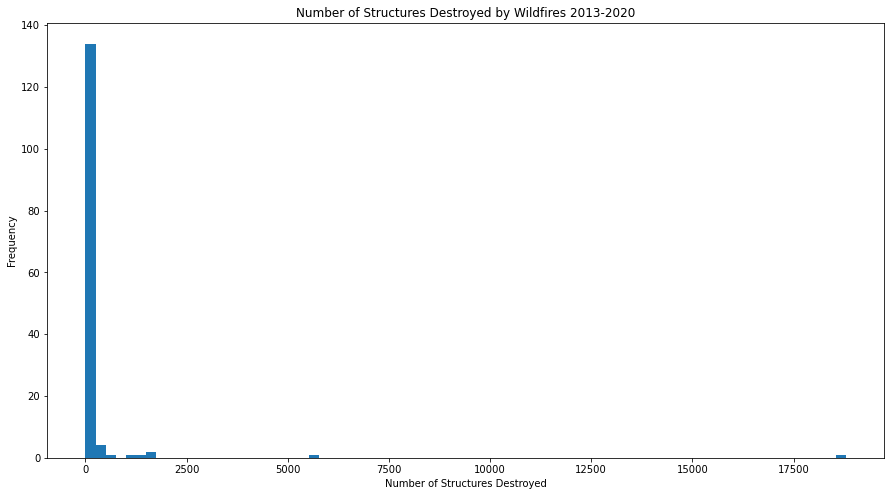

In [103]:
sddf_sorted['StructuresDestroyed'].plot.hist(figsize=(15,8),bins=75)
plt.xlabel('Number of Structures Destroyed')
plt.title('Number of Structures Destroyed by Wildfires 2013-2020')

Now I have a dataframe that is ordered by the number of structures destroyed in a wildfire in California between 2013 and 2020. I'm going to make another dataframe with just the top 10 structures destroyed for the rest of my analysis. I'm choosing to do this for now because the majority of wildfires do not result in largescale structure destruction.  

In [104]:
sd10df = sddf_sorted.head(10)

In [105]:
sd10df

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Latitude,Location,Longitude,MajorIncident,Name,SearchDescription,SearchKeywords,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated
1060,153336.0,"Unified Command: CAL FIRE, Butte County Sherif...",2018,True,Butte,4,39.813400,Pulga Road at Camp Creek Road near Jarbo Gap,-121.434700,True,Camp Fire,"The Camp Fire started on November 8, 2018 off ...","Camp Creek Rd, Highway 70, Feather River Canyo...",2018-11-08T06:33:00Z,NaN,18804.0,NaN,NaN,75dafe80-f18a-4a4a-9a37-4b564c5f6014,2019-11-15T09:30:48.693Z
628,36807.0,CAL FIRE Sonoma-Lake-Napa Unit,2017,True,Napa,"28,49",38.608950,"off of Hwy 128 and Bennett Ln, Calistoga",-122.628790,True,Tubbs Fire (Central LNU Complex),"The Tubbs Fire, part of the Central LNU Comple...","Tubbs Fire, Calistoga, Bennett Ln, Hwy 128, Na...",2017-10-08T21:45:00Z,317.0,5636.0,NaN,NaN,82c2aafa-ef04-49f0-a172-0dfa8a15582e,2019-10-25T08:50:05.017Z
1061,96949.0,Ventura County Fire Dept. and Los Angeles Coun...,2018,True,Los Angeles,"19,56",34.235000,"E Street and Alfa Road Rd, South of Simi Valley",-118.701280,True,Woolsey Fire,"The Woolsey fire started on November 8, 2018 n...","Woolsey Fire, Los Angeles County, Ventura Coun...",2018-11-08T14:24:00Z,341.0,1643.0,NaN,NaN,92d7aeea-7abf-47a4-bf76-a4fe0fac65c6,2019-10-25T10:20:42.273Z
1058,229651.0,"Unified Command: CAL FIRE Shasta-Trinity Unit,...",2018,True,Shasta,"45,53",40.654280,"Hwy 299 and Carr Powerhouse Rd, Whiskeytown",-122.623570,True,Carr Fire,"The Carr Fire started on July 23, 2018 off Hwy...","Carr Fire, July 20218, Shasta County",2018-07-23T13:15:00Z,61.0,1614.0,NaN,NaN,240b1f55-0f4e-448d-a4ce-3ecfec7a6c9d,2019-10-25T09:47:17.29Z
622,56556.0,CAL FIRE Sonoma-Lake-Napa Unit,2017,True,Napa,"28,49",38.404100,"Hwy 12, north of Glen Ellen",-122.520900,True,Nuns / Adobe / Norrbom/ Pressley / Partrick Fi...,"The Nuns Fire started on October 9, 2017 off o...","Hwy 12, Glen Ellen, Sonoma County, October 201...",2017-10-08T22:00:00Z,172.0,1355.0,NaN,NaN,be79d28c-767d-4a0d-b168-e86a5842004f,2019-10-25T08:54:34.15Z
616,281893.0,US Forest Service - Los Padres National Forest,2017,True,Santa Barbara,"42,56",34.415210,"Hwy 150 and Hwy 126, north of Santa Paula",-119.091240,True,Thomas Fire,"The Thomas Fire started on December 4, 2017 of...","Thomas Fire, Ventura County, December 4, 2017",2017-12-04T18:28:00Z,280.0,1063.0,NaN,NaN,d28bc34e-73a8-454d-9e55-dea7bdd40bee,2019-03-14T11:24:00Z
631,36523.0,CAL FIRE Mendocinio Unit,2017,True,Mendocino,23,39.248730,"North of Hwy 20, west of Mendocino National Fo...",-123.166350,True,Redwood Valley Fire (Mendocino Lake Complex),"The Redwood fire started on October 9, 2017 no...","Mendocino County, Redwood Fire, October 2017, ...",2017-10-08T23:36:00Z,44.0,546.0,NaN,NaN,c229ea5c-2ebd-4f80-892e-fc5da8a1eeea,2019-10-25T08:48:34.13Z
1396,77758.0,CAL FIRE Sonoma-Lake-Napa Unit,2019,True,Sonoma,49,38.792458,"John Kincade Road and Burned Mountain Road, no...",-122.780053,True,Kincade Fire,"The Kincade Fire started on October 23, 2018 o...","<a href=""https://tinyurl.com/lakecountymap"">To...",2019-10-23T21:27:00Z,60.0,374.0,NaN,0.0,809d101c-8aa3-4a53-bf20-f38ae7ec7941,2019-11-20T11:02:52.127Z
434,36274.0,San Bernardino National Forest,2016,True,San Bernardino,36,34.303720,"off of I-15 and Hwy 138, north of San Bernardino",-117.493420,True,Blue Cut Fire,The Bluecut Fire started on August 16 off of I...,"off of I-15 and Hwy 138, north of San Bernardi...",2016-08-16T10:44:00Z,3.0,321.0,NaN,NaN,ea5193a1-69bc-4684-bfcd-235c17d36756,2016-08-23T07:45:00Z
451,3929.0,CALFIRE Sonoma-Lake-Napa Unit,2016,True,Lake,17,38.897410,off Hwy 29 and Clayton Creek south of Lower Lake,-122.606640,True,Clayton Fire,"The Clayton Fire started on August 13, 2016 of...","Clayton Fire, Lake County, August 13, 2016",2016-08-13T18:03:00Z,28.0,300.0,NaN,NaN,a0950d5e-6f35-4023-bb60-6737146ba7bd,2016-08-26T18:00:00Z


Now I want to make different charts comparing the wildfire incident aspects. 

### The bar graph below shows the ten fires with the most structures destroyed between 2013 and 2020 in California. 

Text(0.5, 1.0, 'Top 10 Wildfires with Structure Destruction')

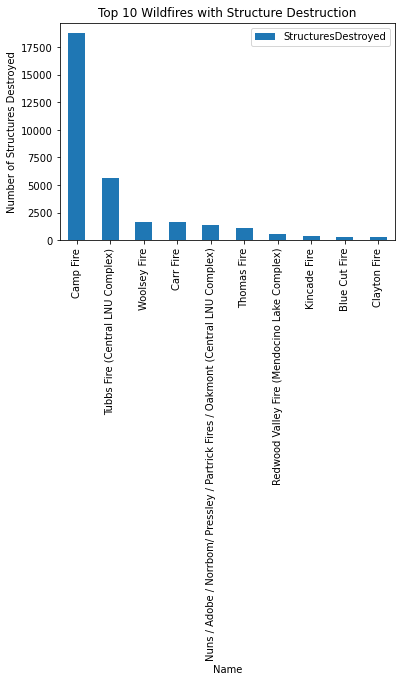

In [43]:
sd10df.plot.bar(x='Name', y='StructuresDestroyed')
plt.ylabel('Number of Structures Destroyed')
plt.title ('Top 10 Wildfires with Structure Destruction')

I think it would also be interesting to see how many total structures were destroyed between the year range of the top 10 wildfires with the most structures destroyed. In order to do this, I have to make another dataframe that will group information by year. It

In [106]:
ygdf = sd10df.groupby('ArchiveYear').sum()

In [107]:
yeargroupdf = ygdf.drop(columns=['CalFireIncident','Latitude','Longitude','MajorIncident','StructuresEvacuated',
                          'StructuresThreatened'])

In [108]:
yeargroupdf

,AcresBurned,StructuresDamaged,StructuresDestroyed
ArchiveYear,,,
2016,40203.0,31.0,621.0
2017,411779.0,813.0,8600.0
2018,479936.0,402.0,22061.0
2019,77758.0,60.0,374.0


In [47]:
reindexyear = yeargroupdf.reset_index()

In [109]:
#I'll have to reindex the table to be able to plot the year the fire happened
reindexyear

,ArchiveYear,AcresBurned,StructuresDamaged,StructuresDestroyed
0,2016,40203.0,31.0,621.0
1,2017,411779.0,813.0,8600.0
2,2018,479936.0,402.0,22061.0
3,2019,77758.0,60.0,374.0


Plotting this information as a line graph or a pie chart would be a useful visual. Comparing the two pie charts shows that the year with most structures destroyed is not necessarily the same as the year with the most acres burned. 

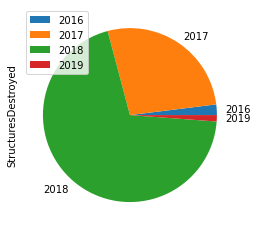

In [134]:
reindexyear.plot.pie(
    labels=["2016","2017","2018","2019"],
    x='ArchiveYear',y='StructuresDestroyed'),
figsize=(6,6)

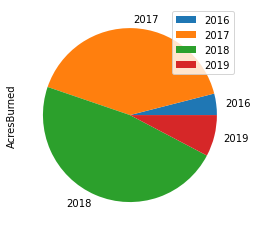

In [123]:
reindexyear.plot.pie(
    labels=["2016","2017","2018","2019"],
    x='ArchiveYear',y='AcresBurned'),
figsize=(6,6)

<AxesSubplot:xlabel='ArchiveYear'>

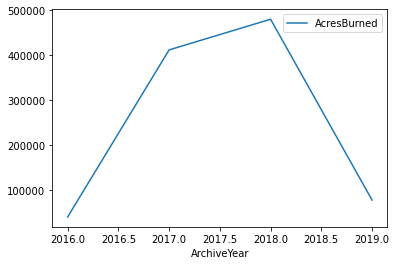

In [135]:
#I want to be able to figure out how to fix the labels and ticks on this chart, so the x-axis is by the whole year, 
#but it shows how acres burned have shifted over time
reindexyear.plot.line(x='ArchiveYear',y='AcresBurned')


Now I want to plot the coordinates in the dataframe, to compare them to each other in location and by acres burned and structures destroyed. The coordinates represent where the wildfire incident began. 

In [137]:
firegdf = gpd.GeoDataFrame(
    sd10df, geometry=gpd.points_from_xy(sd10df.Longitude, sd10df.Latitude))

In [138]:
firegdf

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Latitude,Location,Longitude,MajorIncident,...,SearchDescription,SearchKeywords,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,geometry
1060,153336.0,"Unified Command: CAL FIRE, Butte County Sherif...",2018,True,Butte,4,39.813400,Pulga Road at Camp Creek Road near Jarbo Gap,-121.434700,True,...,"The Camp Fire started on November 8, 2018 off ...","Camp Creek Rd, Highway 70, Feather River Canyo...",2018-11-08T06:33:00Z,NaN,18804.0,NaN,NaN,75dafe80-f18a-4a4a-9a37-4b564c5f6014,2019-11-15T09:30:48.693Z,POINT (-121.43470 39.81340)
628,36807.0,CAL FIRE Sonoma-Lake-Napa Unit,2017,True,Napa,"28,49",38.608950,"off of Hwy 128 and Bennett Ln, Calistoga",-122.628790,True,...,"The Tubbs Fire, part of the Central LNU Comple...","Tubbs Fire, Calistoga, Bennett Ln, Hwy 128, Na...",2017-10-08T21:45:00Z,317.0,5636.0,NaN,NaN,82c2aafa-ef04-49f0-a172-0dfa8a15582e,2019-10-25T08:50:05.017Z,POINT (-122.62879 38.60895)
1061,96949.0,Ventura County Fire Dept. and Los Angeles Coun...,2018,True,Los Angeles,"19,56",34.235000,"E Street and Alfa Road Rd, South of Simi Valley",-118.701280,True,...,"The Woolsey fire started on November 8, 2018 n...","Woolsey Fire, Los Angeles County, Ventura Coun...",2018-11-08T14:24:00Z,341.0,1643.0,NaN,NaN,92d7aeea-7abf-47a4-bf76-a4fe0fac65c6,2019-10-25T10:20:42.273Z,POINT (-118.70128 34.23500)
1058,229651.0,"Unified Command: CAL FIRE Shasta-Trinity Unit,...",2018,True,Shasta,"45,53",40.654280,"Hwy 299 and Carr Powerhouse Rd, Whiskeytown",-122.623570,True,...,"The Carr Fire started on July 23, 2018 off Hwy...","Carr Fire, July 20218, Shasta County",2018-07-23T13:15:00Z,61.0,1614.0,NaN,NaN,240b1f55-0f4e-448d-a4ce-3ecfec7a6c9d,2019-10-25T09:47:17.29Z,POINT (-122.62357 40.65428)
622,56556.0,CAL FIRE Sonoma-Lake-Napa Unit,2017,True,Napa,"28,49",38.404100,"Hwy 12, north of Glen Ellen",-122.520900,True,...,"The Nuns Fire started on October 9, 2017 off o...","Hwy 12, Glen Ellen, Sonoma County, October 201...",2017-10-08T22:00:00Z,172.0,1355.0,NaN,NaN,be79d28c-767d-4a0d-b168-e86a5842004f,2019-10-25T08:54:34.15Z,POINT (-122.52090 38.40410)
616,281893.0,US Forest Service - Los Padres National Forest,2017,True,Santa Barbara,"42,56",34.415210,"Hwy 150 and Hwy 126, north of Santa Paula",-119.091240,True,...,"The Thomas Fire started on December 4, 2017 of...","Thomas Fire, Ventura County, December 4, 2017",2017-12-04T18:28:00Z,280.0,1063.0,NaN,NaN,d28bc34e-73a8-454d-9e55-dea7bdd40bee,2019-03-14T11:24:00Z,POINT (-119.09124 34.41521)
631,36523.0,CAL FIRE Mendocinio Unit,2017,True,Mendocino,23,39.248730,"North of Hwy 20, west of Mendocino National Fo...",-123.166350,True,...,"The Redwood fire started on October 9, 2017 no...","Mendocino County, Redwood Fire, October 2017, ...",2017-10-08T23:36:00Z,44.0,546.0,NaN,NaN,c229ea5c-2ebd-4f80-892e-fc5da8a1eeea,2019-10-25T08:48:34.13Z,POINT (-123.16635 39.24873)
1396,77758.0,CAL FIRE Sonoma-Lake-Napa Unit,2019,True,Sonoma,49,38.792458,"John Kincade Road and Burned Mountain Road, no...",-122.780053,True,...,"The Kincade Fire started on October 23, 2018 o...","<a href=""https://tinyurl.com/lakecountymap"">To...",2019-10-23T21:27:00Z,60.0,374.0,NaN,0.0,809d101c-8aa3-4a53-bf20-f38ae7ec7941,2019-11-20T11:02:52.127Z,POINT (-122.78005 38.79246)
434,36274.0,San Bernardino National Forest,2016,True,San Bernardino,36,34.303720,"off of I-15 and Hwy 138, north of San Bernardino",-117.493420,True,...,The Bluecut Fire started on August 16 off of I...,"off of I-15 and Hwy 138, north of San Bernardi...",2016-08-16T10:44:00Z,3.0,321.0,NaN,NaN,ea5193a1-69bc-4684-bfcd-235c17d36756,2016-08-23T07:45:00Z,POINT (-117.49342 34.30372)
451,3929.0,CALFIRE Sonoma-Lake-Napa Unit,2016,True,Lake,17,38.897410,off Hwy 29 and Clayton Creek south of Lower Lake,-122.606640,True,...,"The Clayton Fire started on August 13, 2016 of...","Clayton Fire, Lake County, August 13, 2016",2016-08-13T18:03:00Z,28.0,300.0,NaN,

I wanted to have a dataframe grouped by county as well (as the earlier data exploration focused on grouping by year or wildfire incident. Counties are a useful way to understand where fires are happening and be able to compare socio-economic data to. 

In [141]:
countyfiregdf = firegdf.groupby('Counties').first()

In [142]:
countyfiregdf

,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,CountyIds,Latitude,Location,Longitude,MajorIncident,Name,SearchDescription,SearchKeywords,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,geometry
Counties,,,,,,,,,,,,,,,,,,,,
Butte,153336.0,"Unified Command: CAL FIRE, Butte County Sherif...",2018,True,4,39.813400,Pulga Road at Camp Creek Road near Jarbo Gap,-121.434700,True,Camp Fire,"The Camp Fire started on November 8, 2018 off ...","Camp Creek Rd, Highway 70, Feather River Canyo...",2018-11-08T06:33:00Z,NaN,18804.0,NaN,NaN,75dafe80-f18a-4a4a-9a37-4b564c5f6014,2019-11-15T09:30:48.693Z,POINT (-121.43470 39.81340)
Lake,3929.0,CALFIRE Sonoma-Lake-Napa Unit,2016,True,17,38.897410,off Hwy 29 and Clayton Creek south of Lower Lake,-122.606640,True,Clayton Fire,"The Clayton Fire started on August 13, 2016 of...","Clayton Fire, Lake County, August 13, 2016",2016-08-13T18:03:00Z,28.0,300.0,NaN,NaN,a0950d5e-6f35-4023-bb60-6737146ba7bd,2016-08-26T18:00:00Z,POINT (-122.60664 38.89741)
Los Angeles,96949.0,Ventura County Fire Dept. and Los Angeles Coun...,2018,True,"19,56",34.235000,"E Street and Alfa Road Rd, South of Simi Valley",-118.701280,True,Woolsey Fire,"The Woolsey fire started on November 8, 2018 n...","Woolsey Fire, Los Angeles County, Ventura Coun...",2018-11-08T14:24:00Z,341.0,1643.0,NaN,NaN,92d7aeea-7abf-47a4-bf76-a4fe0fac65c6,2019-10-25T10:20:42.273Z,POINT (-118.70128 34.23500)
Mendocino,36523.0,CAL FIRE Mendocinio Unit,2017,True,23,39.248730,"North of Hwy 20, west of Mendocino National Fo...",-123.166350,True,Redwood Valley Fire (Mendocino Lake Complex),"The Redwood fire started on October 9, 2017 no...","Mendocino County, Redwood Fire, October 2017, ...",2017-10-08T23:36:00Z,44.0,546.0,NaN,NaN,c229ea5c-2ebd-4f80-892e-fc5da8a1eeea,2019-10-25T08:48:34.13Z,POINT (-123.16635 39.24873)
Napa,36807.0,CAL FIRE Sonoma-Lake-Napa Unit,2017,True,"28,49",38.608950,"off of Hwy 128 and Bennett Ln, Calistoga",-122.628790,True,Tubbs Fire (Central LNU Complex),"The Tubbs Fire, part of the Central LNU Comple...","Tubbs Fire, Calistoga, Bennett Ln, Hwy 128, Na...",2017-10-08T21:45:00Z,317.0,5636.0,NaN,NaN,82c2aafa-ef04-49f0-a172-0dfa8a15582e,2019-10-25T08:50:05.017Z,POINT (-122.62879 38.60895)
San Bernardino,36274.0,San Bernardino National Forest,2016,True,36,34.303720,"off of I-15 and Hwy 138, north of San Bernardino",-117.493420,True,Blue Cut Fire,The Bluecut Fire started on August 16 off of I...,"off of I-15 and Hwy 138, north of San Bernardi...",2016-08-16T10:44:00Z,3.0,321.0,NaN,NaN,ea5193a1-69bc-4684-bfcd-235c17d36756,2016-08-23T07:45:00Z,POINT (-117.49342 34.30372)
Santa Barbara,281893.0,US Forest Service - Los Padres National Forest,2017,True,"42,56",34.415210,"Hwy 150 and Hwy 126, north of Santa Paula",-119.091240,True,Thomas Fire,"The Thomas Fire started on December 4, 2017 of...","Thomas Fire, Ventura County, December 4, 2017",2017-12-04T18:28:00Z,280.0,1063.0,NaN,NaN,d28bc34e-73a8-454d-9e55-dea7bdd40bee,2019-03-14T11:24:00Z,POINT (-119.09124 34.41521)
Shasta,229651.0,"Unified Command: CAL FIRE Shasta-Trinity Unit,...",2018,True,"45,53",40.654280,"Hwy 299 and Carr Powerhouse Rd, Whiskeytown",-122.623570,True,Carr Fire,"The Carr Fire started on July 23, 2018 off Hwy...","Carr Fire, July 20218, Shasta County",2018-07-23T13:15:00Z,61.0,1614.0,NaN,NaN,240b1f55-0f4e-448d-a4ce-3ecfec7a6c9d,2019-10-25T09:47:17.29Z,POINT (-122.62357 40.65428)
Sonoma,77758.0,CAL FIRE Sonoma-Lake-Napa Unit,2019,True,49,38.792458,"John Kincade Road and Burned Mountain Road, no...",-122.780053,True,Kincade Fire,"The Kincade Fire started on October 23, 2018 o...","<a href=""https://tinyurl.com/lakecountymap"">To...",2019-10-23T21:27:00Z,60.0,374.0,NaN,0.0,809d101c-8aa3-4a53-bf20-f38ae7ec7941,2019-11-20T11:02:52.127Z,POINT (-122.78005 38.79246)


You can see in the table above that the 10 wilfires with the most structures destroyed happened in 9 counties. Santa Barabara had the most acres burned while  Butte County had the most structures destroyed. 

Below, I attempted to insert a new geoid column to merge with the counties column, so I could possibly map the counties but I was unsuccessful in plotting a map with further detail beyond just plotting the coordinates. 

In [149]:
cfr = countyfiregdf.reset_index()


In [150]:
cfr['geoid'] = ['05000US06007','05000US06033','05000US06037','05000US06045','05000US06055','05000US06071',
                '05000US06083','05000US06089','05000US06097']

In [151]:
cfr

,Counties,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,CountyIds,Latitude,Location,Longitude,MajorIncident,...,SearchKeywords,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,geometry,geoid
0,Butte,153336.0,"Unified Command: CAL FIRE, Butte County Sherif...",2018,True,4,39.813400,Pulga Road at Camp Creek Road near Jarbo Gap,-121.434700,True,...,"Camp Creek Rd, Highway 70, Feather River Canyo...",2018-11-08T06:33:00Z,NaN,18804.0,NaN,NaN,75dafe80-f18a-4a4a-9a37-4b564c5f6014,2019-11-15T09:30:48.693Z,POINT (-121.43470 39.81340),05000US06007
1,Lake,3929.0,CALFIRE Sonoma-Lake-Napa Unit,2016,True,17,38.897410,off Hwy 29 and Clayton Creek south of Lower Lake,-122.606640,True,...,"Clayton Fire, Lake County, August 13, 2016",2016-08-13T18:03:00Z,28.0,300.0,NaN,NaN,a0950d5e-6f35-4023-bb60-6737146ba7bd,2016-08-26T18:00:00Z,POINT (-122.60664 38.89741),05000US06033
2,Los Angeles,96949.0,Ventura County Fire Dept. and Los Angeles Coun...,2018,True,"19,56",34.235000,"E Street and Alfa Road Rd, South of Simi Valley",-118.701280,True,...,"Woolsey Fire, Los Angeles County, Ventura Coun...",2018-11-08T14:24:00Z,341.0,1643.0,NaN,NaN,92d7aeea-7abf-47a4-bf76-a4fe0fac65c6,2019-10-25T10:20:42.273Z,POINT (-118.70128 34.23500),05000US06037
3,Mendocino,36523.0,CAL FIRE Mendocinio Unit,2017,True,23,39.248730,"North of Hwy 20, west of Mendocino National Fo...",-123.166350,True,...,"Mendocino County, Redwood Fire, October 2017, ...",2017-10-08T23:36:00Z,44.0,546.0,NaN,NaN,c229ea5c-2ebd-4f80-892e-fc5da8a1eeea,2019-10-25T08:48:34.13Z,POINT (-123.16635 39.24873),05000US06045
4,Napa,36807.0,CAL FIRE Sonoma-Lake-Napa Unit,2017,True,"28,49",38.608950,"off of Hwy 128 and Bennett Ln, Calistoga",-122.628790,True,...,"Tubbs Fire, Calistoga, Bennett Ln, Hwy 128, Na...",2017-10-08T21:45:00Z,317.0,5636.0,NaN,NaN,82c2aafa-ef04-49f0-a172-0dfa8a15582e,2019-10-25T08:50:05.017Z,POINT (-122.62879 38.60895),05000US06055
5,San Bernardino,36274.0,San Bernardino National Forest,2016,True,36,34.303720,"off of I-15 and Hwy 138, north of San Bernardino",-117.493420,True,...,"off of I-15 and Hwy 138, north of San Bernardi...",2016-08-16T10:44:00Z,3.0,321.0,NaN,NaN,ea5193a1-69bc-4684-bfcd-235c17d36756,2016-08-23T07:45:00Z,POINT (-117.49342 34.30372),05000US06071
6,Santa Barbara,281893.0,US Forest Service - Los Padres National Forest,2017,True,"42,56",34.415210,"Hwy 150 and Hwy 126, north of Santa Paula",-119.091240,True,...,"Thomas Fire, Ventura County, December 4, 2017",2017-12-04T18:28:00Z,280.0,1063.0,NaN,NaN,d28bc34e-73a8-454d-9e55-dea7bdd40bee,2019-03-14T11:24:00Z,POINT (-119.09124 34.41521),05000US06083
7,Shasta,229651.0,"Unified Command: CAL FIRE Shasta-Trinity Unit,...",2018,True,"45,53",40.654280,"Hwy 299 and Carr Powerhouse Rd, Whiskeytown",-122.623570,True,...,"Carr Fire, July 20218, Shasta County",2018-07-23T13:15:00Z,61.0,1614.0,NaN,NaN,240b1f55-0f4e-448d-a4ce-3ecfec7a6c9d,2019-10-25T09:47:17.29Z,POINT (-122.62357 40.65428),05000US06089
8,Sonoma,77758.0,CAL FIRE Sonoma-Lake-Napa Unit,2019,True,49,38.792458,"John Kincade Road and Burned Mountain Road, no...",-122.780053,True,...,"<a href=""https://tinyurl.com/lakecountymap"">To...",2019-10-23T21:27:00Z,60.0,374.0,NaN,0.0,809d101c-8aa3-4a53-bf20-f38ae7ec7941,2019-11-20T11:02:52.127Z,POINT (-122.78005 38.79246),05000US06097


Text(0.5, 1.0, 'Acres Burned in 10 Most Destructive CA Wildfires 2013-2020')

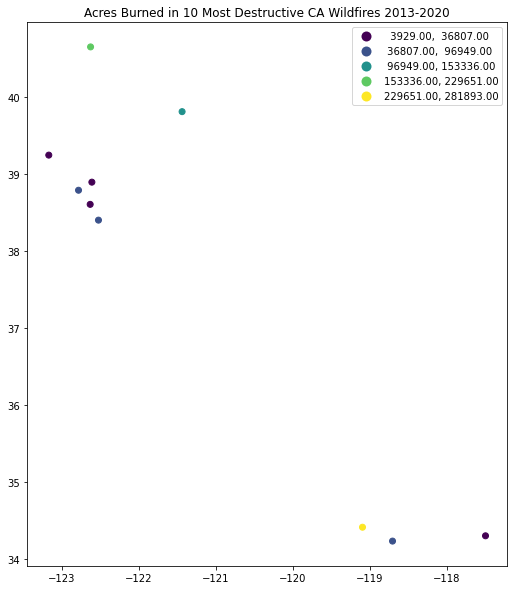

In [157]:

firegdf.plot(figsize=(10,10),
                column='AcresBurned',
                legend=True, 
                scheme='NaturalBreaks')
plt.title("Acres Burned in 10 Most Destructive CA Wildfires 2013-2020")


Text(0.5, 1.0, '10 CA Wildfires with Most Structures Destroyed 2013-2020')

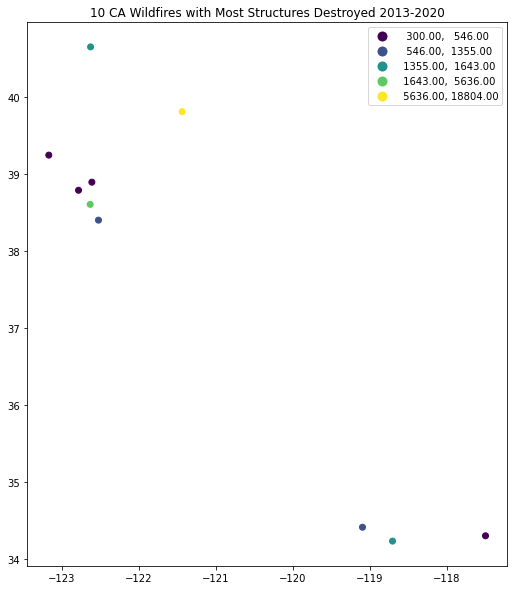

In [158]:
firegdf.plot(figsize=(10,10),
                 column='StructuresDestroyed',
                 legend=True, 
                 scheme='NaturalBreaks')
plt.title("10 CA Wildfires with Most Structures Destroyed 2013-2020")

Next, I bring in county level housing tenure data from 2019 from Census Reporter, to have a map that shows me home ownership percentages. Eventually I would like to compare where the most structures damaged and what homeowner tenure is like in those counties. 

I spend the next few cells cleaning up the data, renaming the columns, normalizing the data so I can compare the numbers with each other. 

In [161]:
acstenure = gpd.read_file('acs2019_5yr_B25003_05000US06083.geojson')

In [162]:
acstenure.head()

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
0,04000US06,California,13044266.0,20333.0,7154580.0,37872.0,5889686.0,21311.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."
1,05000US06001,"Alameda County, CA",577177.0,1744.0,308891.0,2593.0,268286.0,2245.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
2,05000US06003,"Alpine County, CA",350.0,69.0,294.0,60.0,56.0,25.0,"MULTIPOLYGON (((-120.07333 38.70109, -120.0732..."
3,05000US06005,"Amador County, CA",14594.0,448.0,11165.0,442.0,3429.0,392.0,"MULTIPOLYGON (((-121.02729 38.48136, -121.0272..."
4,05000US06007,"Butte County, CA",85320.0,891.0,50331.0,856.0,34989.0,932.0,"MULTIPOLYGON (((-121.85650 39.53358, -121.8563..."


In [163]:
acstenure =acstenure.drop([0])

In [72]:
acstenure_keep = ['geoid','name','B25003001','B25003002','B25003003','geometry']

In [73]:
acstenure = acstenure[acstenure_keep]

In [74]:
acstenure.head()

,geoid,name,B25003001,B25003002,B25003003,geometry
1,05000US06001,"Alameda County, CA",577177.0,308891.0,268286.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
2,05000US06003,"Alpine County, CA",350.0,294.0,56.0,"MULTIPOLYGON (((-120.07333 38.70109, -120.0732..."
3,05000US06005,"Amador County, CA",14594.0,11165.0,3429.0,"MULTIPOLYGON (((-121.02729 38.48136, -121.0272..."
4,05000US06007,"Butte County, CA",85320.0,50331.0,34989.0,"MULTIPOLYGON (((-121.85650 39.53358, -121.8563..."
5,05000US06009,"Calaveras County, CA",16942.0,13173.0,3769.0,"MULTIPOLYGON (((-120.63093 38.34110, -120.6305..."


In [169]:
acstenure = acstenure.rename(columns={'name':'Counties','B25003001':'Total','B25003002':'OwnerOccupied','B25003003':'RenterOccupied'})
acstenure.head()

,geoid,Counties,Total,"B25003001, Error",OwnerOccupied,"B25003002, Error",RenterOccupied,"B25003003, Error",geometry
1,05000US06001,"Alameda County, CA",577177.0,1744.0,308891.0,2593.0,268286.0,2245.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
2,05000US06003,"Alpine County, CA",350.0,69.0,294.0,60.0,56.0,25.0,"MULTIPOLYGON (((-120.07333 38.70109, -120.0732..."
3,05000US06005,"Amador County, CA",14594.0,448.0,11165.0,442.0,3429.0,392.0,"MULTIPOLYGON (((-121.02729 38.48136, -121.0272..."
4,05000US06007,"Butte County, CA",85320.0,891.0,50331.0,856.0,34989.0,932.0,"MULTIPOLYGON (((-121.85650 39.53358, -121.8563..."
5,05000US06009,"Calaveras County, CA",16942.0,552.0,13173.0,519.0,3769.0,431.0,"MULTIPOLYGON (((-120.63093 38.34110, -120.6305..."


In [170]:
acstenure['percentOwnerOccupied'] = acstenure['OwnerOccupied']/acstenure['Total']*100
acstenure['percentRenterOccupied'] = acstenure['RenterOccupied']/acstenure['Total']*100

In [171]:
acstenure.head()

,geoid,Counties,Total,"B25003001, Error",OwnerOccupied,"B25003002, Error",RenterOccupied,"B25003003, Error",geometry,percentOwnerOccupied,percentRenterOccupied
1,05000US06001,"Alameda County, CA",577177.0,1744.0,308891.0,2593.0,268286.0,2245.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817...",53.517552,46.482448
2,05000US06003,"Alpine County, CA",350.0,69.0,294.0,60.0,56.0,25.0,"MULTIPOLYGON (((-120.07333 38.70109, -120.0732...",84.000000,16.000000
3,05000US06005,"Amador County, CA",14594.0,448.0,11165.0,442.0,3429.0,392.0,"MULTIPOLYGON (((-121.02729 38.48136, -121.0272...",76.504043,23.495957
4,05000US06007,"Butte County, CA",85320.0,891.0,50331.0,856.0,34989.0,932.0,"MULTIPOLYGON (((-121.85650 39.53358, -121.8563...",58.990858,41.009142
5,05000US06009,"Calaveras County, CA",16942.0,552.0,13173.0,519.0,3769.0,431.0,"MULTIPOLYGON (((-120.63093 38.34110, -120.6305...",77.753512,22.246488


Below I merge the tenure info table with the wildfire info table on the geoid column. However I'm unable to map anything with this cfr1 table so I know I did something wrong, but I'm not sure how to fix it. 

In [172]:
cfr1 = cfr.merge(acstenure.set_index('geoid'), on='geoid',how='left')

In [173]:
cfr1

,Counties_x,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,CountyIds,Latitude,Location,Longitude,MajorIncident,...,Counties_y,Total,"B25003001, Error",OwnerOccupied,"B25003002, Error",RenterOccupied,"B25003003, Error",geometry_y,percentOwnerOccupied,percentRenterOccupied
0,Butte,153336.0,"Unified Command: CAL FIRE, Butte County Sherif...",2018,True,4,39.813400,Pulga Road at Camp Creek Road near Jarbo Gap,-121.434700,True,...,"Butte County, CA",85320.0,891.0,50331.0,856.0,34989.0,932.0,"MULTIPOLYGON (((-121.85650 39.53358, -121.8563...",58.990858,41.009142
1,Lake,3929.0,CALFIRE Sonoma-Lake-Napa Unit,2016,True,17,38.897410,off Hwy 29 and Clayton Creek south of Lower Lake,-122.606640,True,...,"Lake County, CA",25660.0,710.0,17034.0,588.0,8626.0,716.0,"MULTIPOLYGON (((-123.06515 39.05918, -123.0651...",66.383476,33.616524
2,Los Angeles,96949.0,Ventura County Fire Dept. and Los Angeles Coun...,2018,True,"19,56",34.235000,"E Street and Alfa Road Rd, South of Simi Valley",-118.701280,True,...,"Los Angeles County, CA",3316795.0,5782.0,1519516.0,10428.0,1797279.0,7074.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033...",45.812780,54.187220
3,Mendocino,36523.0,CAL FIRE Mendocinio Unit,2017,True,23,39.248730,"North of Hwy 20, west of Mendocino National Fo...",-123.166350,True,...,"Mendocino County, CA",34408.0,643.0,20611.0,659.0,13797.0,758.0,"MULTIPOLYGON (((-123.83841 39.55492, -123.8396...",59.901767,40.098233
4,Napa,36807.0,CAL FIRE Sonoma-Lake-Napa Unit,2017,True,"28,49",38.608950,"off of Hwy 128 and Bennett Ln, Calistoga",-122.628790,True,...,"Napa County, CA",48705.0,496.0,31276.0,635.0,17429.0,606.0,"MULTIPOLYGON (((-122.46389 38.70520, -122.4638...",64.215173,35.784827
5,San Bernardino,36274.0,San Bernardino National Forest,2016,True,36,34.303720,"off of I-15 and Hwy 138, north of San Bernardino",-117.493420,True,...,"San Bernardino County, CA",636041.0,2447.0,380281.0,3411.0,255760.0,2743.0,"MULTIPOLYGON (((-117.66724 34.73433, -117.6672...",59.788756,40.211244
6,Santa Barbara,281893.0,US Forest Service - Los Padres National Forest,2017,True,"42,56",34.415210,"Hwy 150 and Hwy 126, north of Santa Paula",-119.091240,True,...,"Santa Barbara County, CA",145856.0,881.0,75945.0,1197.0,69911.0,1291.0,"MULTIPOLYGON (((-120.73429 34.90069, -120.7343...",52.068478,47.931522
7,Shasta,229651.0,"Unified Command: CAL FIRE Shasta-Trinity Unit,...",2018,True,"45,53",40.654280,"Hwy 299 and Carr Powerhouse Rd, Whiskeytown",-122.623570,True,...,"Shasta County, CA",71181.0,714.0,45548.0,808.0,25633.0,735.0,"MULTIPOLYGON (((-122.61527 40.88107, -122.6147...",63.988986,36.011014
8,Sonoma,77758.0,CAL FIRE Sonoma-Lake-Napa Unit,2019,True,49,38.792458,"John Kincade Road and Burned Mountain Road, no...",-122.780053,True,...,"Sonoma County, CA",189374.0,1128.0,116393.0,1492.0,72981.0,1567.0,"MULTIPOLYGON (((-122.93506 38.31395, -122.9350...",61.461975,38.538025


Below I plot percentage renter occupied tenure across California counties as a chloropleth map. 

Text(0.5, 1.0, 'Percent Renter Occupied Housing by County in CA')

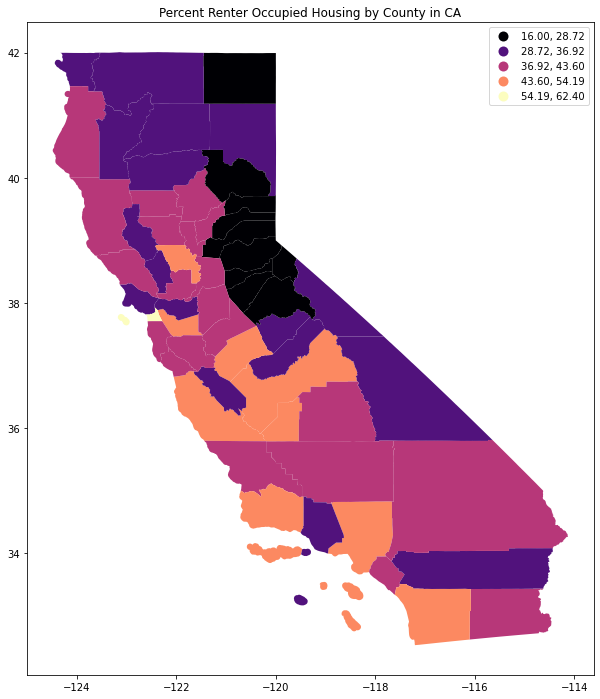

In [184]:
acstenure.plot(figsize=(12,12),
          column='percentRenterOccupied',
          cmap='magma',
          legend=True,
          scheme='NaturalBreaks')
plt.title('Percent Renter Occupied Housing by County in CA')

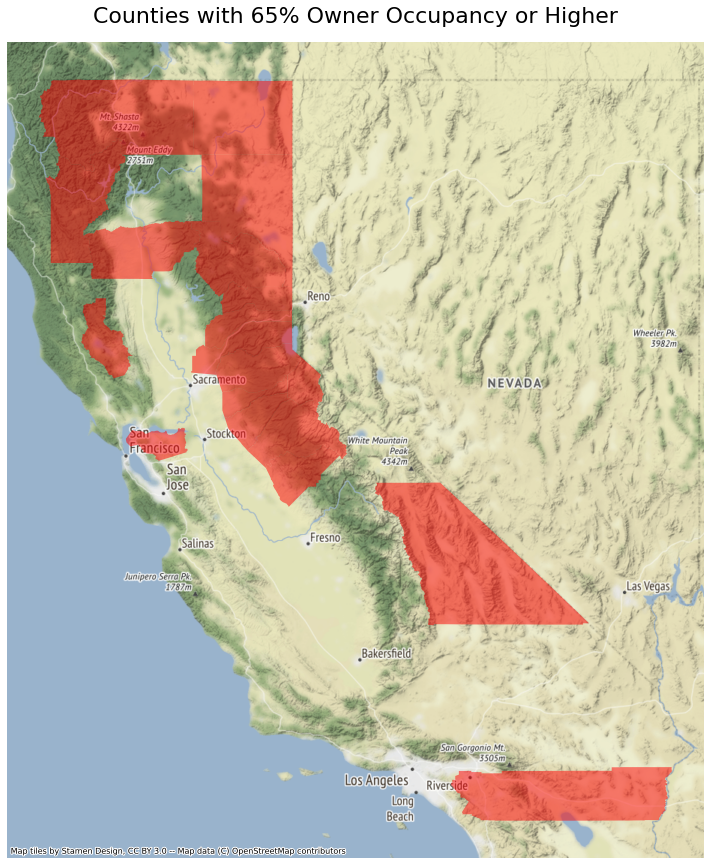

In [195]:
import folium 

fig, ax=plt.subplots(figsize=(15,15))
acstenure_web_mercator = acstenure.to_crs(epsg=3857)
acstenure_web_mercator[acstenure_web_mercator['percentOwnerOccupied'] > 65].plot(ax=ax,color='red',alpha=0.5)

ax.axis ('off')
ax.set_title('Counties with 65% Owner Occupancy or Higher',fontsize=22,pad=20)
ctx.add_basemap(ax)

Looking at the map above, it seems like a lot of the counties further away from urban centers (with the exception of Contra Costa County), have higher percentages of homeownership. Wildland Urban Interface maps also indicate that it is in these areas where human made structures are also more likely to intermix with wildfires. 

I tried again below with the fire coordinate data but was unsuccessful in mapping it. 

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


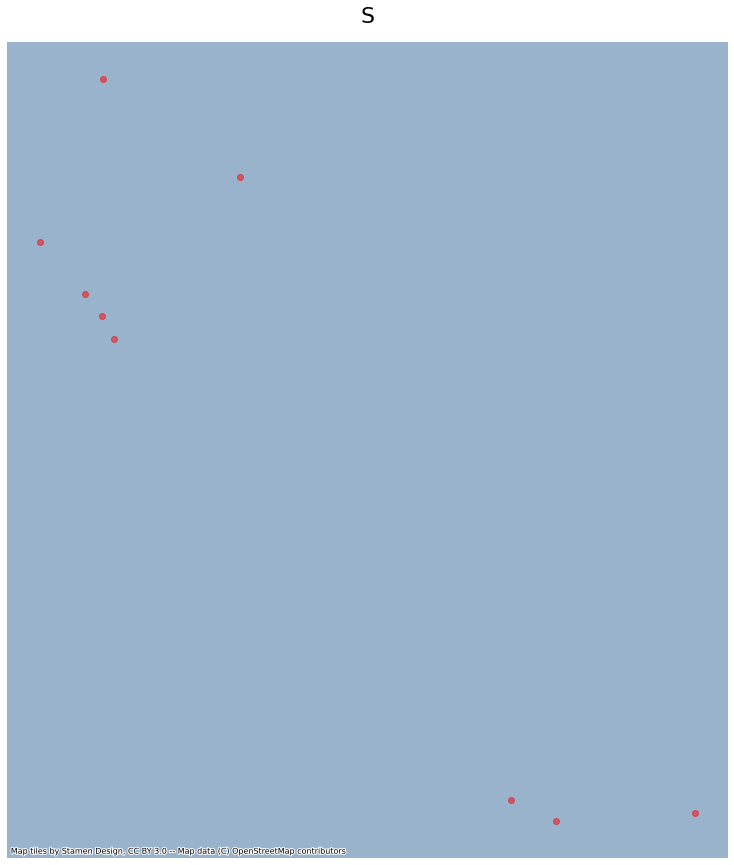

In [196]:
import folium 

fig, ax=plt.subplots(figsize=(15,15))
firegdf_web_mercator = firegdf.to_crs(epsg=3857)
firegdf_web_mercator[firegdf_web_mercator['StructuresDestroyed'] > 300].plot(ax=ax,color='red',alpha=0.5)

ax.axis ('off')
ax.set_title('S',fontsize=22,pad=20)
ctx.add_basemap(ax)

# Division of Labor
Jess and I both worked on data exploration of the wildfire incidents csv and the ACS census data on housing tenure. I produced the charts in the presentation and the statewide and San Jose MSA chloropleth maps, along with the county homeownership percentage map. Jess worked on the interactive map, made the Santa Rose MSA chloropleth map, found the data we used, and designed the presentation. 